TASK 1

       Study Hours  Attendance       Pass
count     10.00000   10.000000  10.000000
mean       5.50000   80.400000   0.700000
std        3.02765   12.842637   0.483046
min        1.00000   60.000000   0.000000
25%        3.25000   71.250000   0.250000
50%        5.50000   82.500000   1.000000
75%        7.75000   88.750000   1.000000
max       10.00000   99.000000   1.000000


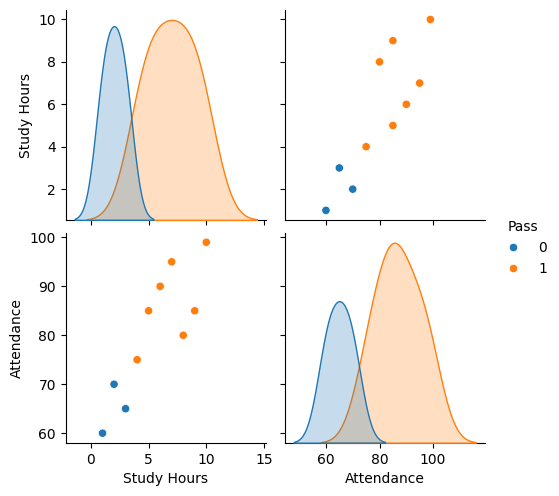

Accuracy: 0.5
Confusion Matrix:
 [[0 0]
 [1 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



C:\Users\mitha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mitha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mitha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: Unde

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Sample dataset
data = {
    'Study Hours': [2, 5, 1, 6, 7, 8, 10, 3, 4, 9],
    'Attendance': [70, 85, 60, 90, 95, 80, 99, 65, 75, 85],
    'Pass': [0, 1, 0, 1, 1, 1, 1, 0, 1, 1]
}
df = pd.DataFrame(data)

# Exploratory Data Analysis
print(df.describe())
sns.pairplot(df, hue='Pass')
plt.show()

# Splitting the dataset
X = df[['Study Hours', 'Attendance']]
y = df['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


task 2

In [4]:
import pandas as pd

# Create sample data
data = {
    "Review": [
        "I loved the product! It works perfectly.",
        "This is the worst thing I ever bought.",
        "Absolutely fantastic service and quality.",
        "Terrible experience. Not recommended.",
        "It’s okay, not too great but not bad either.",
        "Great value for money!",
        "The item was broken when it arrived.",
        "Super satisfied with the purchase.",
        "Disappointed. Doesn’t work as expected.",
        "Amazing! Will buy again."
    ],
    "Sentiment": [
        "positive",
        "negative",
        "positive",
        "negative",
        "negative",
        "positive",
        "negative",
        "positive",
        "negative",
        "positive"
    ]
}

# Convert to DataFrame and save as CSV
df1 = pd.DataFrame(data)
df1.to_csv("reviews.csv", index=False)
print("Sample dataset saved as 'reviews.csv'")


Sample dataset saved as 'reviews.csv'


In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Download NLTK data if not already present
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mitha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mitha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mitha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
# Load the dataset
df1 = pd.read_csv("reviews.csv")  # Make sure 'reviews.csv' is in the same directory

# Show the first 5 rows
print(df1.head())


                                         Review Sentiment
0      I loved the product! It works perfectly.  positive
1        This is the worst thing I ever bought.  negative
2     Absolutely fantastic service and quality.  positive
3         Terrible experience. Not recommended.  negative
4  It’s okay, not too great but not bad either.  negative


In [7]:
# Check if any column has missing values
print(df1.isnull().sum())

# Drop any rows with missing data
df1.dropna(inplace=True)


Review       0
Sentiment    0
dtype: int64


In [10]:
# Define text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return " ".join(tokens)

# Apply preprocessing
df1['Cleaned_Review'] = df1['Review'].apply(preprocess_text)

# Show cleaned reviews
print(df1[['Review', 'Cleaned_Review']])


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\mitha/nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\share\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\lib\\nltk_data'
    - 'C:\\Users\\mitha\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [11]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Review'])

# Convert labels to binary (1 = positive, 0 = negative)
y = df['Sentiment'].map({'positive': 1, 'negative': 0})


KeyError: 'Cleaned_Review'

In [12]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (8, 2)
X_test shape: (2, 2)


In [13]:
# Create and train model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [14]:
# Make predictions
y_pred = model.predict(X_test)

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5
Confusion Matrix:
 [[0 0]
 [1 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



C:\Users\mitha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mitha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mitha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: Unde